In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn.linear_model as sklm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
import matplotlib.pylab as plt
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
import graphviz
import pydotplus as pplus
from IPython.display import Image
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, \
    RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
pd.set_option('display.notebook_repr_html', False)
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#This function helps with drawing decision trees using the pydotplus and graphviz libraries
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [3]:
df= pd.read_csv('worldvalues-data.csv')# why you did not find significant results

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,5,6,7,8,9,10,11,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,62,63,64,65,66,67,68,69,70,71,77,84,85,86,87,88,89,90,91,92,93,94,95,96,97,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,123,124,125,126,127,144,145,146,147,148,149,150,162,163,167,168,169,170,171,177,178,179,180,181,182,183,184,185,190,191,192,193,194,195,196,197,198,199,206,207,208,217,218,234,239,244,245,246,264,281,282,283,295,296,298,302,303,304,305,308,309,310,311,312,313,314,315,316,321,322,323,327,332,335,337,346,347,348,349,351,352,353,436) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(89565, 440)

In [5]:
df_imp= df[['V4', 'V5', 'V6','V7','V8', 'V9','V23']]# taking a subset from the dataset

In [6]:
df_imp.shape

(89565, 7)

In [7]:
df_imp.V23= df_imp.V23.astype(str)
df_imp.V23.replace('-1', 'Dont know', inplace= True)
df_imp.V23.replace('-2', 'No answer', inplace= True)
df_imp.V23.value_counts()

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


8                          17800
7                          15156
10                         12077
5                          11535
6                          10611
9                           9167
4                           4561
3                           3426
Completely dissatisfied     2818
2                           1828
Dont know                    303
No answer                    279
-5                             4
Name: V23, dtype: int64

In [8]:
df_imp.replace(['No answer','Dont know'], np.NaN,inplace=True)# replacing the 'No answer','Dont know' answers with NaN

df_imp.head()

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


  V4 V5 V6   V7 V8 V9 V23
0  1  1  1  NaN  1  1   8
1  1  2  3    4  2  2   5
2  1  3  2    4  2  1   4
3  1  1  3    4  3  1   8
4  1  1  1    2  1  1   8

In [9]:
df_imp.dropna(how= 'all', inplace= True) # deleting all the rows which have  'No answer','Dont know' answers

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_imp.shape

(89524, 7)

In [11]:
df_imp.V4.value_counts()

1                                                                                   71039
1                                                                                   11018
2                                                                                    5516
3                                                                                     664
2                                                                                     664
4                                                                                     264
3                                                                                      42
BH,HT: Missing; AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}       21
4                                                                                      17
Name: V4, dtype: int64

In [12]:
df_imp.V4.dtype

dtype('O')

In [13]:
len(df_imp[df_imp.V5 == 1])

3776

In [14]:
len(df_imp[df_imp.V5 == '1'])

37801

In [15]:
df_imp[df_imp['V5'] == 'RU:Inappropriate response{Inappropriate}']

                                                      V4  \
57024                                                  1   
57126                                                  1   
57876                                                  2   
58032                                                  1   
58208                                                  1   
72816  BH,HT: Missing; AR,DE,SE: Inapplicable;RU: Ina...   

                                             V5  \
57024  RU:Inappropriate response{Inappropriate}   
57126  RU:Inappropriate response{Inappropriate}   
57876  RU:Inappropriate response{Inappropriate}   
58032  RU:Inappropriate response{Inappropriate}   
58208  RU:Inappropriate response{Inappropriate}   
72816  RU:Inappropriate response{Inappropriate}   

                                                      V6  \
57024  AR,DE,SE: Inapplicable;RU: Inappropriate respo...   
57126                                                  3   
57876                                    

In [16]:
df_imp.V5.replace('RU:Inappropriate response{Inappropriate}', 100, inplace = True)
df_imp[df_imp['V5'] == 100]

                                                      V4   V5  \
57024                                                  1  100   
57126                                                  1  100   
57876                                                  2  100   
58032                                                  1  100   
58208                                                  1  100   
72816  BH,HT: Missing; AR,DE,SE: Inapplicable;RU: Ina...  100   

                                                      V6  \
57024  AR,DE,SE: Inapplicable;RU: Inappropriate respo...   
57126                                                  3   
57876                                                  2   
58032                                                  4   
58208  AR,DE,SE: Inapplicable;RU: Inappropriate respo...   
72816  AR,DE,SE: Inapplicable;RU: Inappropriate respo...   

                                                      V7  \
57024  HT: Missing; PS,SE: Inapplicable;RU: Inappropr...   
571

In [17]:
df_imp.V5.isna().sum()
df_imp.V5.dropna(inplace = True)
df_imp.V5.isna().sum()

# df_imp.V5.replace('RU:Inappropriate response{Inappropriate}', 100, inplace = True)
# df_imp[df_imp['V5'] == 100]

# df_imp.V5 = df_imp.V5.astype(int)
# df_imp.V5.dtype
    

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


0

In [18]:
df_imp.V5 = df_imp.V5.astype(int)
df_imp.V5.dtype

dtype('float64')

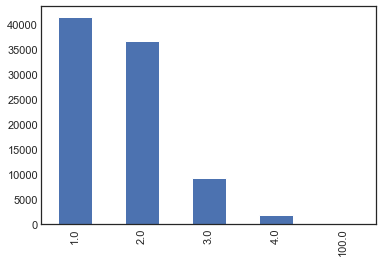

In [19]:
df_imp['V5'].value_counts().plot(kind="bar")# Shift+tab- functions, esc- A & B new tab


In [20]:
df_imp.V4.replace('BH,HT: Missing; AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}', 100, inplace = True)
df_imp[df_imp['V4'] == 100]

        V4     V5                                                 V6  \
2335   100    1.0                                                  1   
2337   100    3.0                                                  2   
2719   100    1.0                                                  1   
3093   100    3.0                                                  2   
20326  100    2.0                                                  3   
20791  100    4.0                                                  2   
20886  100    2.0                                                  2   
21711  100    3.0  AR,DE,SE: Inapplicable;RU: Inappropriate respo...   
21866  100    1.0                                                  1   
23852  100    1.0                                                  1   
25693  100    NaN                                                NaN   
56749  100    2.0                                                  2   
57748  100    1.0                                               

In [21]:
df_imp.V4.value_counts()

1      71039
1      11018
2       5516
3        664
2        664
4        264
3         42
100       21
4         17
Name: V4, dtype: int64

In [22]:
df_imp[['V4','V6','V7', 'V8','V9','V23']].isna().sum()# can use command isna for all the columns 


V4      279
V6      956
V7     1557
V8     1146
V9     1285
V23     541
dtype: int64

In [23]:
df_imp.V4.fillna(1000, inplace= True)# have to run fillna for each column separately
df_imp.V6.fillna(1000, inplace= True)
df_imp.V23.fillna(1000, inplace= True)
df_imp[['V4','V6','V7', 'V8','V9','V23']].isna().sum()
df_imp.V7.dropna(inplace = True)
df_imp['V7'].isna().sum()

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [24]:
df_imp[['V8','V9']].isna().sum()


V8    1146
V9    1285
dtype: int64

In [25]:
df_imp.V8.dropna(inplace = True)
df_imp.V8.isna().sum()

0

In [26]:
df_imp.V9.dropna(inplace = True)
df_imp.V9.isna().sum()

0

In [27]:
df_imp.drop(df_imp.loc[df_imp['V4']==1000].index, inplace=True)# deleting the rows with missing values
df_imp.drop(df_imp.loc[df_imp['V5']==1000].index, inplace=True)
df_imp.drop(df_imp.loc[df_imp['V6']==1000].index, inplace=True)
df_imp.drop(df_imp.loc[df_imp['V23']==1000].index, inplace=True)

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
df_imp.V23.unique()

array(['8', '5', '4', '7', '6', '3', '10', 'Completely dissatisfied', '9',
       '2', '-5'], dtype=object)

In [29]:
df_imp.V8.unique()

array(['1', '2', '3', '4', nan,
       'BH,HT: Missing; AR,DE,PS,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',
       'Not applicable', 1, 2, 3, 4], dtype=object)

In [30]:
df_imp.V9.unique()

array(['1', '2', '4', nan, '3',
       'BH,HT: Missing; RU:Inappropriate response{Inappropriate}', 1, 2,
       3, 4], dtype=object)

In [31]:
df_imp.V6.replace('AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}', 100, inplace= True)
df_imp.V7.replace('HT: Missing; PS,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',100, inplace= True)
df_imp.V7.replace('Not applicable',100, inplace= True)
df_imp.V8.replace('BH,HT: Missing; AR,DE,PS,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',100, inplace= True)
df_imp.V8.replace('Not applicable', 100, inplace = True)
df_imp.V9.replace('BH,HT: Missing; RU:Inappropriate response{Inappropriate}',100, inplace= True)

In [32]:
df_imp.replace( 100, np.NaN,inplace=True)

In [33]:
df_imp1= df_imp[['V4','V5','V6','V7', 'V8','V9','V23' ]]

In [34]:
df_imp1.dropna(how= 'any', inplace= True)

In [35]:
df_imp1.shape

(84999, 7)

In [36]:
df_imp= df_imp1

In [37]:
df_imp.V4 = df_imp.V4.astype(int)
df_imp.V5 = df_imp.V5.astype(int)

In [38]:
df_imp.V5.dtype

dtype('int32')

In [39]:
df_imp.V6 = df_imp.V6.astype(int) # changing datatype to integer for V6, V7, V8, and V9
df_imp.V6.dtype
df_imp.V7= df_imp.V7.astype(int)
df_imp.V7.dtype
df_imp.V8= df_imp.V8.astype(int)
df_imp.V8.dtype
df_imp.V9= df_imp.V9.astype(int)
df_imp.V9.dtype

dtype('int32')

In [40]:
df_imp.V23.replace('Completely dissatisfied', 1, inplace= True)


In [41]:
df_imp.V23.value_counts()

8     17089
7     14509
10    11617
5     10925
6     10145
9      8810
4      4303
3      3249
1      2654
2      1694
-5        4
Name: V23, dtype: int64

In [42]:
df_imp.V23 = df_imp.V23.astype(int)
df_imp.V23.dtype

dtype('int32')

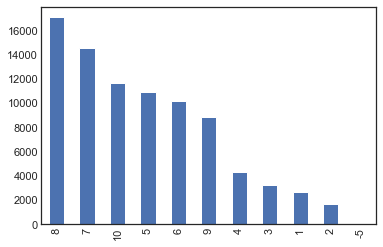

In [43]:
df_imp['V23'].value_counts().plot(kind="bar")

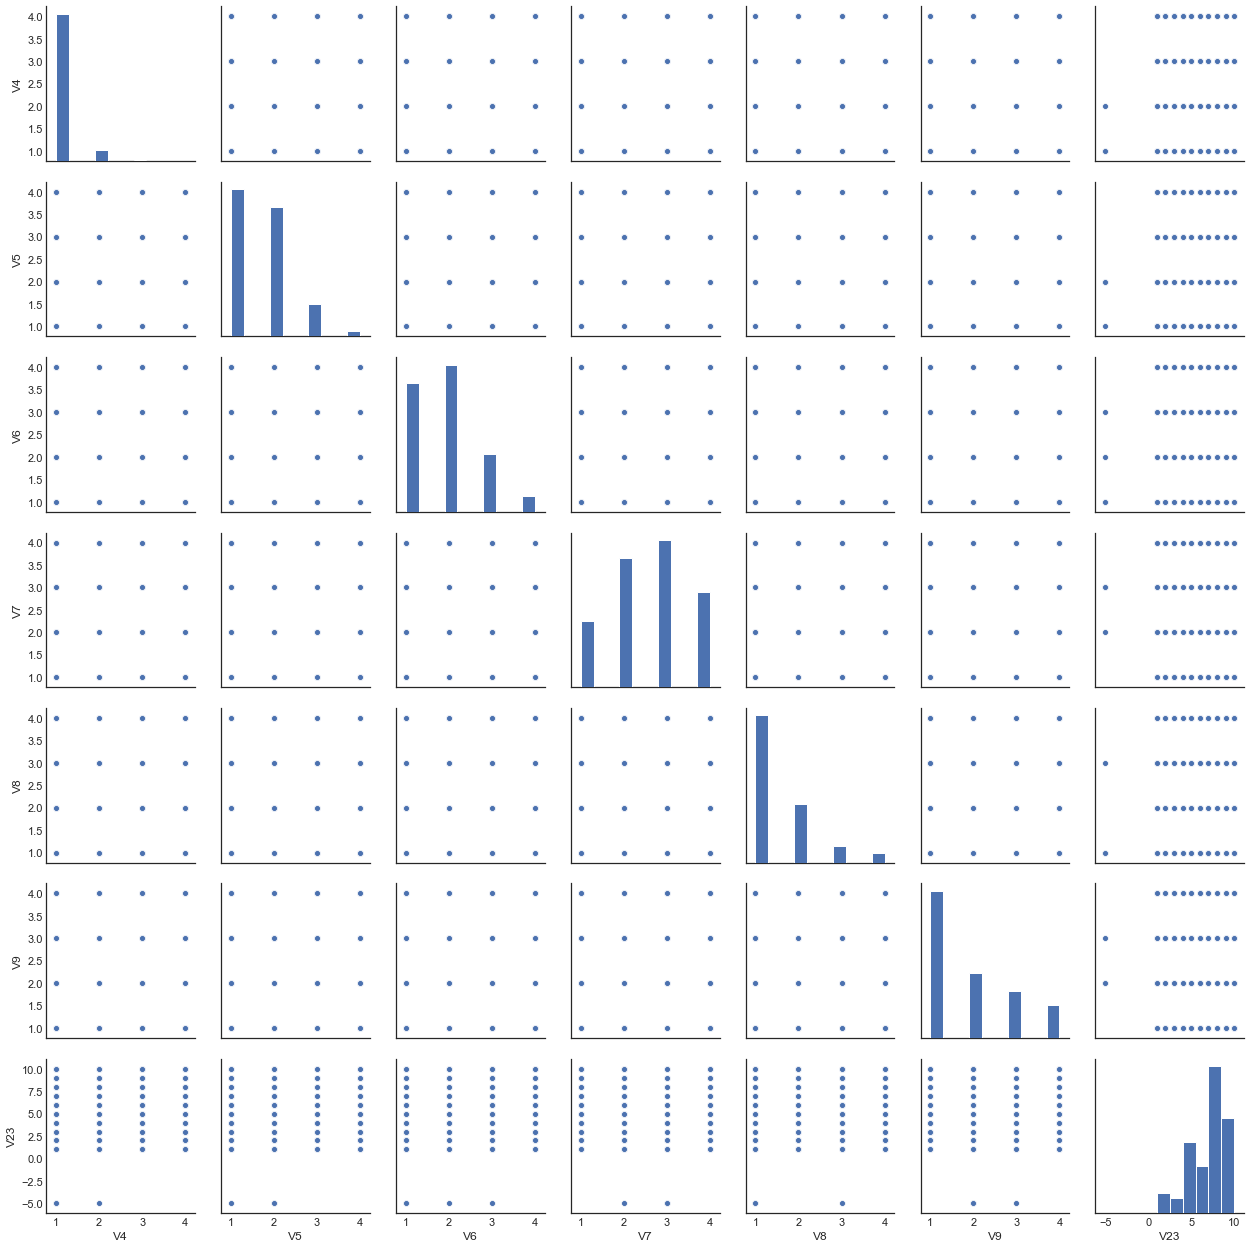

In [44]:
sns.pairplot(df_imp)

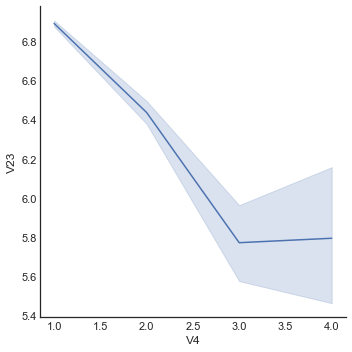

In [45]:
sns.relplot(x= 'V4', y= 'V23', data=df_imp, kind = 'line')# data is in range 


(1, 10)

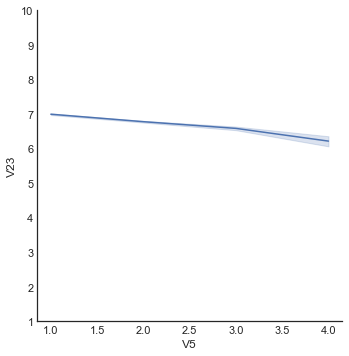

In [46]:
sns.relplot(x= 'V5', y= 'V23', data=df_imp, kind = 'line')
plt.ylim(1,10)

(1, 10)

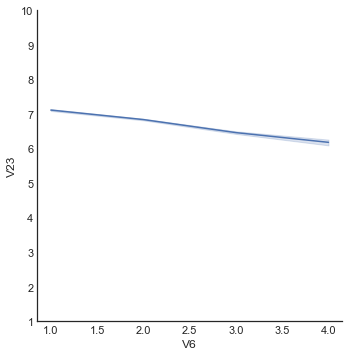

In [47]:
sns.relplot(x= 'V6', y= 'V23', data=df_imp, kind = 'line')
plt.ylim(1,10)

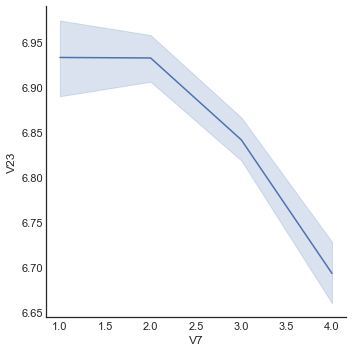

In [48]:
sns.relplot(x= 'V7', y= 'V23', data=df_imp, kind = 'line')

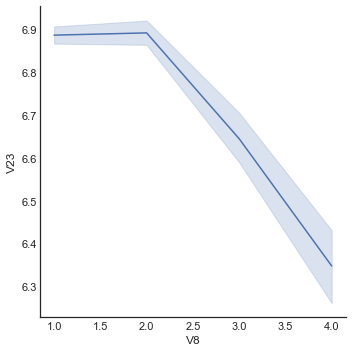

In [49]:
sns.relplot(x= 'V8', y= 'V23', data=df_imp, kind = 'line')

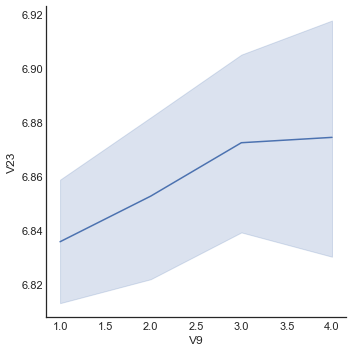

In [50]:
sns.relplot(x= 'V9', y= 'V23', data=df_imp, kind = 'line')


In [51]:
df1= df_imp.groupby(['V5'])['V23'].count().reset_index()# pivot
df1

   V5    V23
0   1  39857
1   2  34906
2   3   8668
3   4   1568

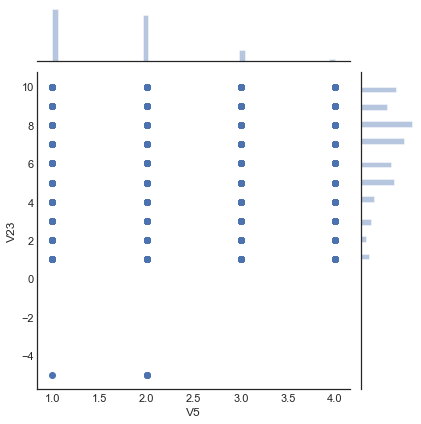

In [52]:
sns.jointplot(x='V5', y='V23', data=df_imp)

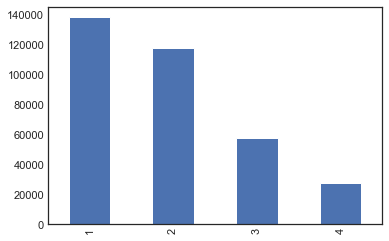

In [53]:
df_imp[['V5','V6','V7','V8']].stack().value_counts().plot(kind="bar")

(0, 10)

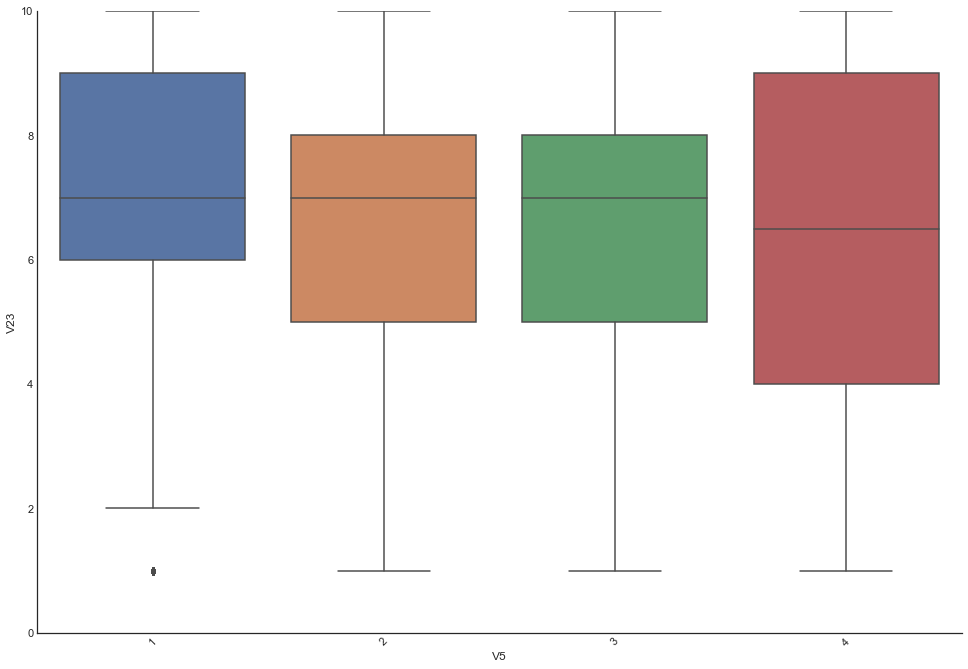

In [54]:
sns.catplot(x='V5', y='V23', kind='box', data=df_imp)
plt.gcf().set_size_inches(15, 10)
plt.tick_params(axis='x', rotation=45)
plt.ylim(0,10)

(0, 10)

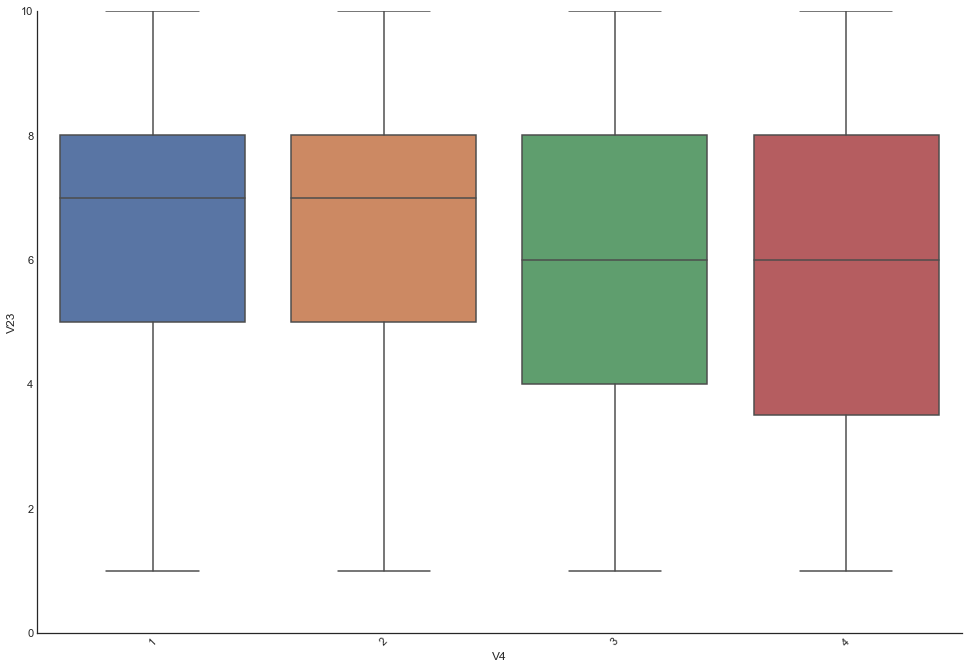

In [55]:
sns.catplot(x='V4', y='V23', kind='box', data=df_imp)
plt.gcf().set_size_inches(15, 10)
plt.tick_params(axis='x', rotation=45)
plt.ylim(0,10)

(0, 10)

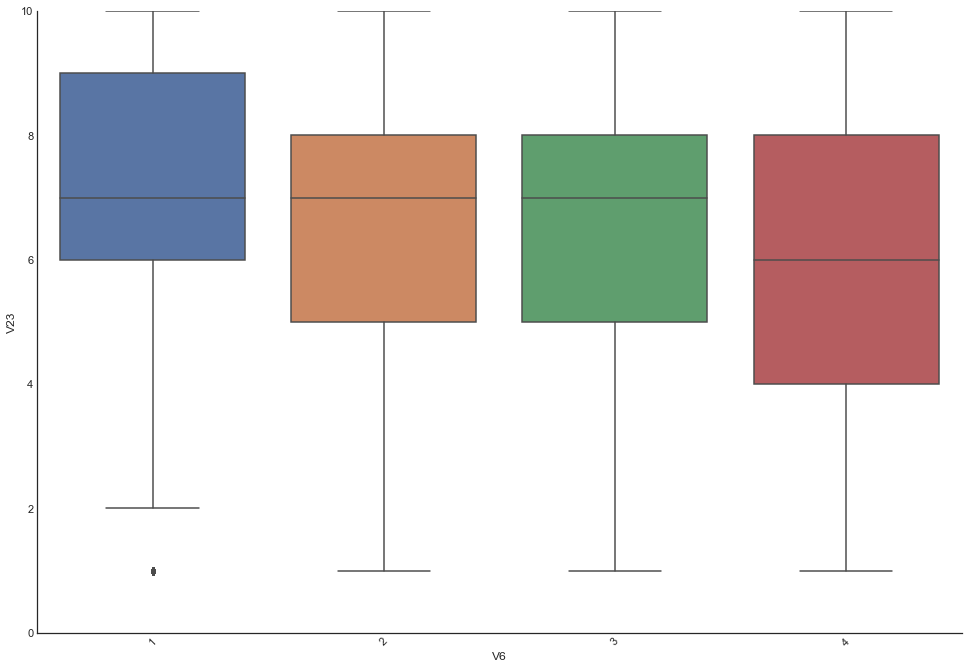

In [56]:
sns.catplot(x='V6', y='V23', kind='box', data=df_imp)
plt.gcf().set_size_inches(15, 10)
plt.tick_params(axis='x', rotation=45)
plt.ylim(0,10)

(0, 10)

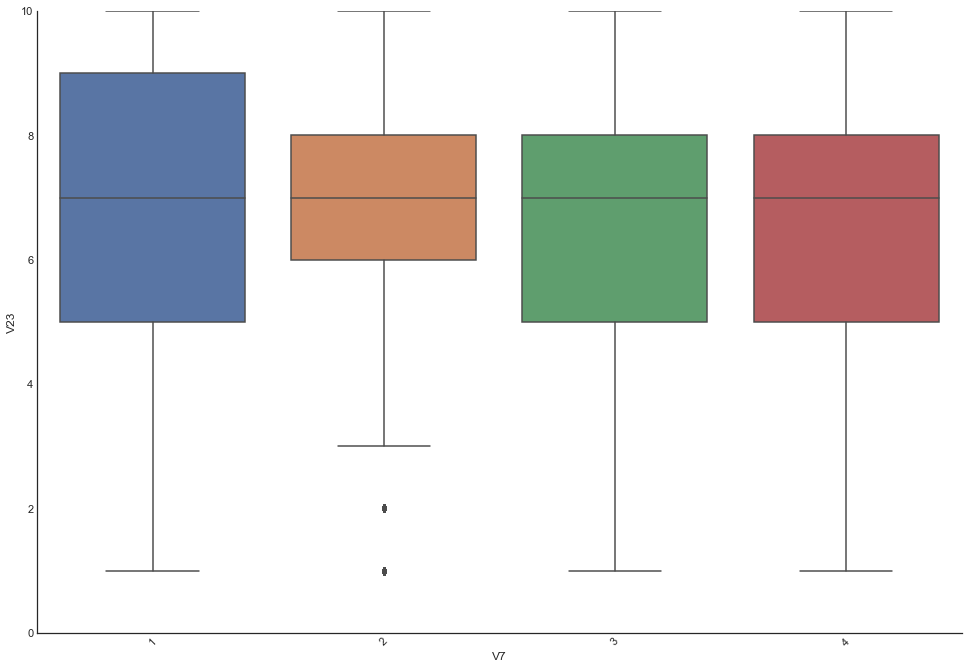

In [57]:
sns.catplot(x='V7', y='V23', kind='box', data=df_imp)
plt.gcf().set_size_inches(15, 10)
plt.tick_params(axis='x', rotation=45)
plt.ylim(0,10)

(0, 10)

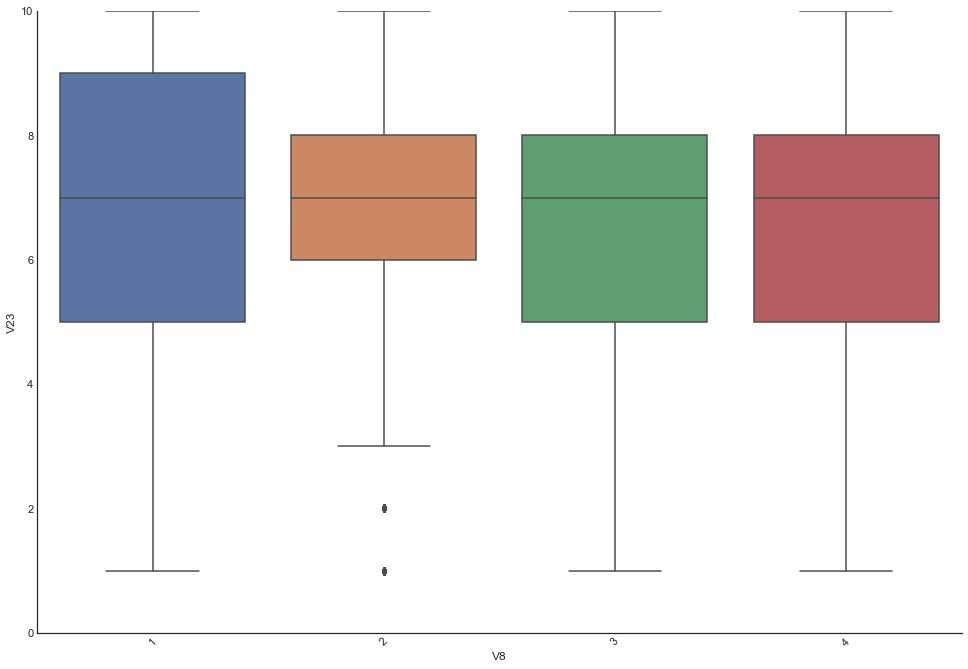

In [58]:
sns.catplot(x='V8', y='V23', kind='box', data=df_imp)
plt.gcf().set_size_inches(15, 10)
plt.tick_params(axis='x', rotation=45)
plt.ylim(0,10)

(0, 10)

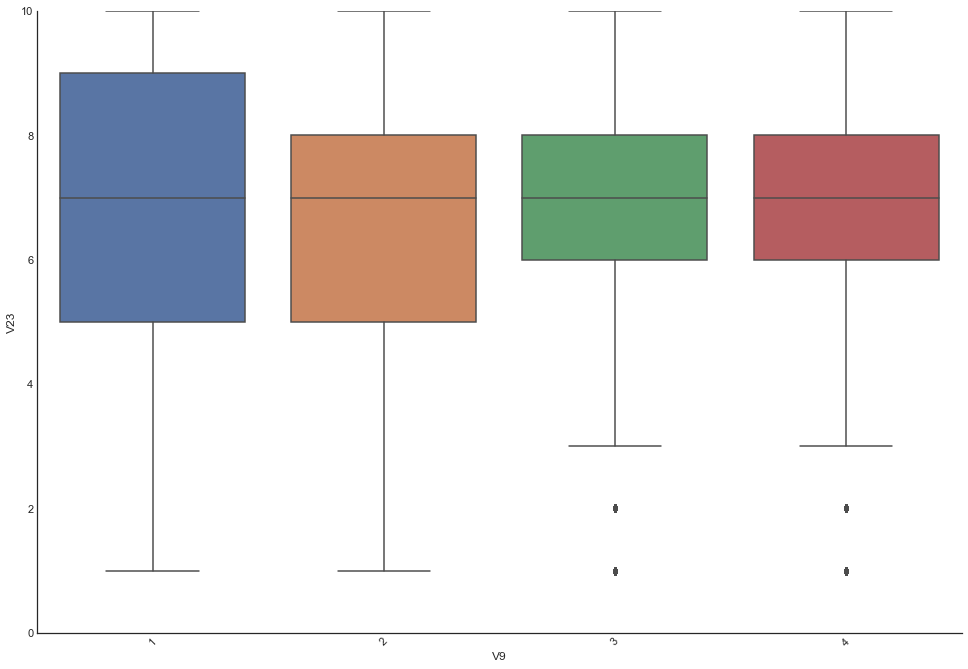

In [59]:
sns.catplot(x='V9', y='V23', kind='box', data=df_imp)
plt.gcf().set_size_inches(15, 10)
plt.tick_params(axis='x', rotation=45)
plt.ylim(0,10)

In [60]:
# how to predict satisfaction level from inputs such as importance of family, friend, leisure time, politics, work, religion

### Linear regression

In [61]:
Xvar= df_imp[['V4','V5','V6','V7', 'V8','V9']]
Yvar=df_imp['V23']
Xvar.head(2)

   V4  V5  V6  V7  V8  V9
1   1   2   3   4   2   2
2   1   3   2   4   2   1

In [62]:
Xvar_train, Xvar_test, Yvar_train, Yvar_test = train_test_split(Xvar, Yvar, test_size=0.20)
print(Xvar_train.shape, Yvar_train.shape)
print(Xvar_test.shape, Yvar_test.shape)

(67999, 6) (67999,)
(17000, 6) (17000,)


In [63]:
sfxreg=sklm.LinearRegression()
sfxreg.fit(Xvar_train, Yvar_train)
scores_mse_lm =  cross_validate(sfxreg, Xvar_train, Yvar_train, cv=5, scoring='neg_mean_squared_error')
scores_mse_lm['test_score'].mean()

-5.070141604640155

In [64]:
np.sqrt(scores_mse_lm['test_score'].mean()*-1)

2.2516974940342576

In [65]:
np.sqrt(np.square((sfxreg.predict(Xvar_test)-Yvar_test)).mean()) 

2.235240384492315

### KNN Regression

In [66]:
Xp=preprocessing.scale(df_imp[['V4','V5','V6','V7', 'V8','V9']]).astype('float64')#scaling
yp=preprocessing.scale(df_imp.V23).astype('float64')#scaling
knn_rcv = KNeighborsRegressor(n_neighbors=4, weights='uniform')# this is the model

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(Xp, yp, test_size=0.20)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(67999, 6) (67999,)
(17000, 6) (17000,)


In [68]:
knn_rcv.fit(X_train, Y_train)
scores_mse =  cross_validate(knn_rcv, X_train, Y_train, cv=5, scoring='neg_mean_squared_error') 
scores_mse['test_score'].mean()

-1.233529455795321

In [69]:
np.sqrt(scores_mse['test_score'].mean()*-1) # training error 

1.1106437123557316

In [70]:
np.sqrt(np.square((knn_rcv.predict(X_test)-Y_test)).mean()) # average error in predicting test data

1.1321137459987214

### Regression Trees

In [71]:
df_imp.drop(df_imp.loc[df_imp['V23']== -5].index, inplace=True)
df_imp.shape

(84995, 7)

In [72]:
df_imp.V23.unique()

array([ 5,  4,  8,  7,  6,  3, 10,  1,  9,  2], dtype=int64)

In [73]:
X1= df_imp[['V4','V5','V6','V7', 'V8','V9']].values
y1 = df_imp.V23.values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.5)

In [74]:
regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X1_train, y1_train)
pred = regtree.predict(X1_test)

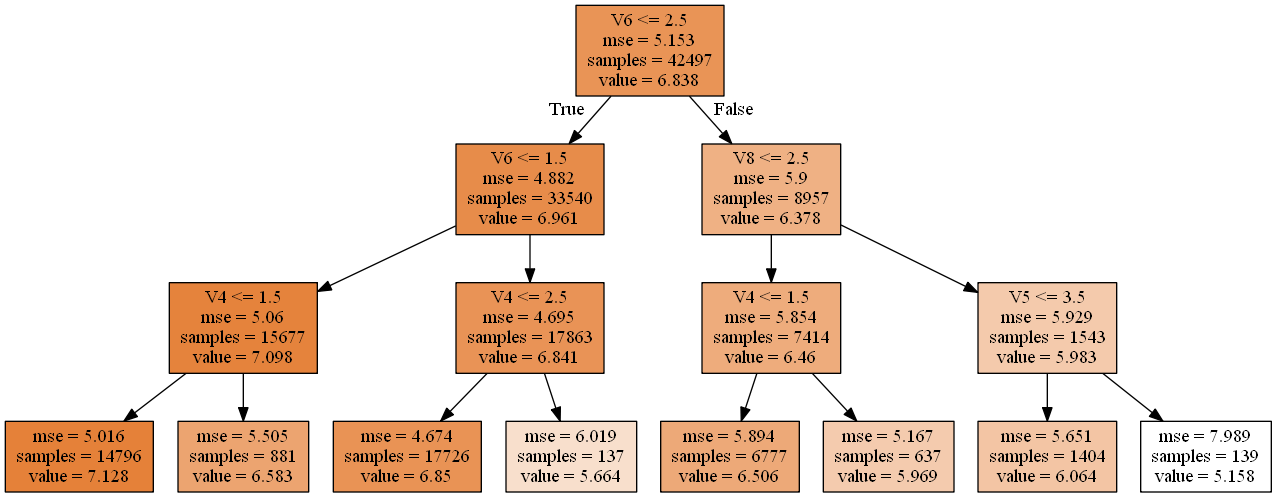

In [75]:
graph = print_tree(regtree, features=df_imp[['V4','V5','V6','V7', 'V8','V9']].columns)
Image(graph.create_png())

In [76]:
from sklearn.metrics import mean_squared_error
dt_fit=regtree.fit(X1_train, y1_train)
dt_scores = cross_val_score(dt_fit, X1_train, y1_train, cv = 4, scoring="neg_mean_squared_error")
print("mean cross validation score: {}".format(np.mean(dt_scores)))

mean cross validation score: -5.066423175404166


In [99]:
df_c= df[df['V2','V4','V5','V6','V7', 'V8','V9','V10','V11','V23','V59','V240','V239','V242','248' ]]

KeyError: ('V2', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V23', 'V59', 'V240', 'V239', 'V242', '248')

In [77]:
df_mem= df[['V23', 'V25', 'V26']]
df_mem.head(1)

  V23 V25 V26
0   8   0   0

In [78]:
df_mem.V23.unique()

array(['8', '5', '4', '7', '6', '3', '10', 'Completely dissatisfied', '9',
       '-1', '-2', '2', '-5'], dtype=object)

In [79]:
df_mem.V25.replace('HT: Dropped out survey;SE: Inapplicable;RU: Inappropriate response{Inappropriate}', 99, inplace= True)
df_mem.V26.replace('HT: Dropped out survey;RU:Inappropriate response{Inappropriate}', 99, inplace= True)

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [80]:
df_mem.V25.replace(-5, 99, inplace= True)
df_mem.V25.replace('No answer', 99, inplace= True)
df_mem.V26.replace('Dont know', 99, inplace= True)
df_mem.V26.replace('No answer', 99, inplace= True)

In [81]:
df_mem.V25.unique()

array(['0', '1', '2', 99, 'Dont know', 0, 2, 1], dtype=object)

In [82]:
droprows=df_mem[df_mem['V25']==99].index

In [83]:
df_mem.drop(droprows, inplace=True)

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [85]:
2
3
# delete all rows with column 'Age' has value 30 to 40 
#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
#dfObj.drop(indexNames , inplace=True)

3

In [86]:
df.V59.unique()

array(['10', '6', '4', '8', '5', '9', '7', 'Completely dissatisfied',
       '-2', '2', '3', '-1', '-5'], dtype=object)

In [87]:
df.V59.replace('Completely dissatisfied', 1, inplace= True)

In [88]:
df.V59= df.V59.astype(int)

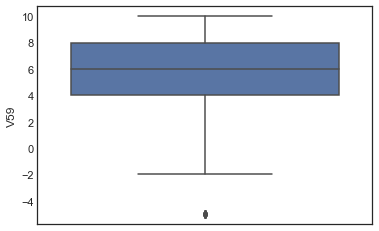

In [89]:
sns.boxplot( y=df['V59'] )

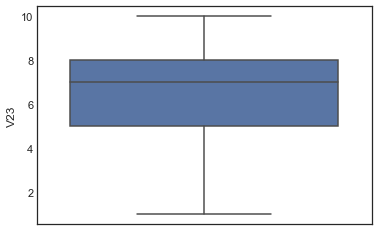

In [90]:
sns.boxplot( y=df_imp['V23'] )

(1, 10)

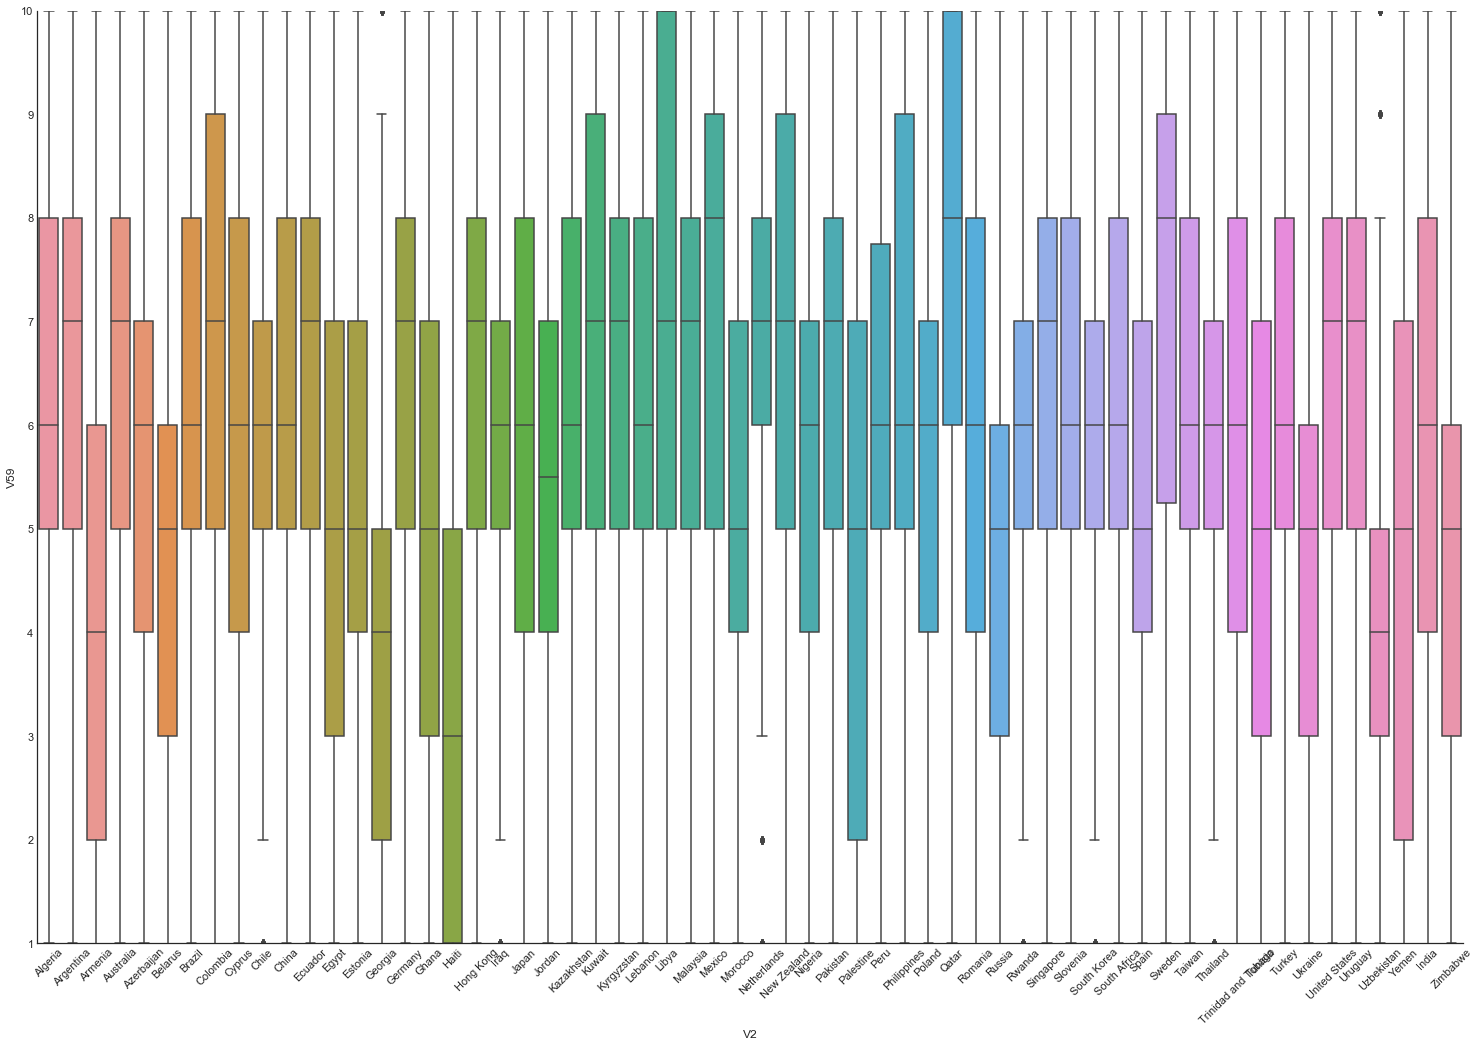

In [91]:
sns.catplot(x='V2', y='V59', kind='box', data=df)
plt.gcf().set_size_inches(25, 15)
plt.tick_params(axis='x', rotation=45)
plt.ylim(1,10)

In [92]:
df.V23.replace('Completely dissatisfied', 1, inplace= True)

In [93]:
df.V23= df.V23.astype(int)

In [94]:
df.V23.unique()

array([ 8,  5,  4,  7,  6,  3, 10,  1,  9, -1, -2,  2, -5], dtype=int64)

(1, 10)

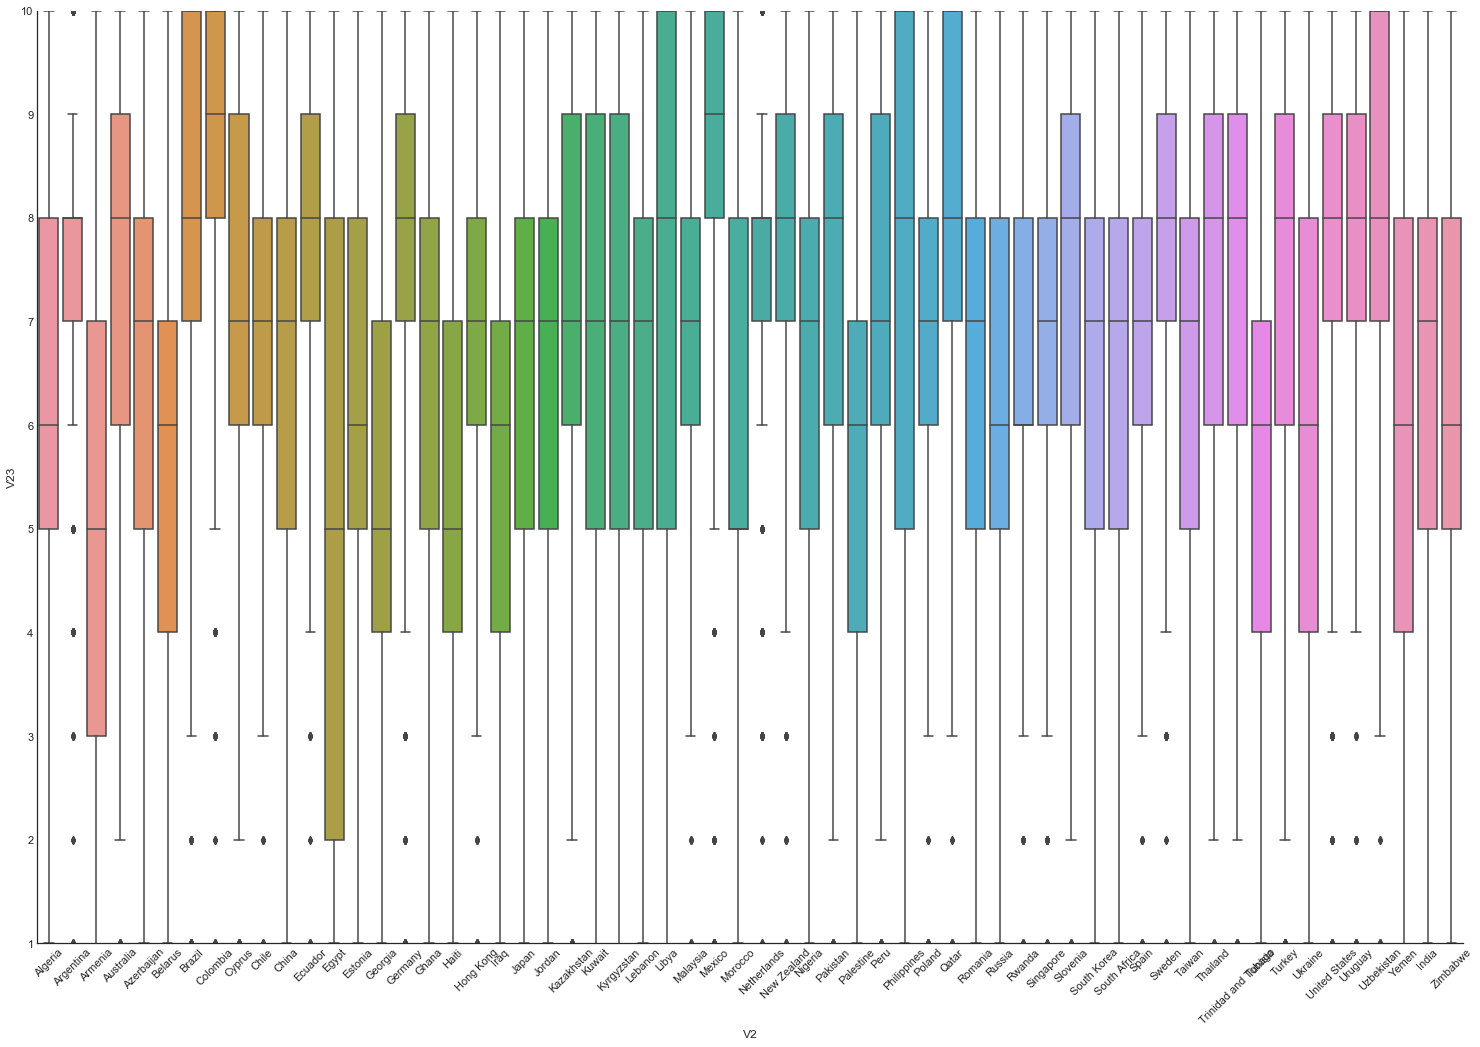

In [95]:
sns.catplot(x='V2', y='V23', kind='box', data=df)
plt.gcf().set_size_inches(25, 15)
plt.tick_params(axis='x', rotation=45)
plt.ylim(1,10)

In [96]:
df.V10.unique()

array(['2', '1', '3', '4', 'No answer', 'Dont know', 1, 2, 3, 4,
       'HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}'],
      dtype=object)

In [97]:
df.V11.replace('BH:Missing;HT:Missing-Dropped out survey; RU:Inappropriate response{Inappropriate}',\
             0, inplace= True)
df.V11.unique()

array(['1', '2', '3', '4', 'No answer', 'Dont know', 2, 3, 4, 1, 0],
      dtype=object)

In [98]:
df.V11= df.V11.astype(int)

ValueError: invalid literal for int() with base 10: 'No answer'

In [ ]:
sns.boxplot( x=df['V11'] )

In [103]:
df2= df[['V2','V4','V5','V6','V7', 'V8','V9','V10','V11','V23','V59','V240','V239','V242','V248']]

In [104]:
df2.head(1)

        V2 V4 V5 V6         V7 V8 V9 V10 V11  V23  V59 V240        V239 V242  \
0  Algeria  1  1  1  No answer  1  1   2   1    8   10    1  Fifth step   21   

                                                V248  
0  Complete secondary school: university-preparat...  

In [145]:
df2.V239.unique()

array(['Sixth step', 'Fifth step', 'Seventh step', 'second step',
       'Fourth step', 'Third step', 'Lower step', 'Eigth step', '9', '10'],
      dtype=object)

In [131]:
df2.V4.replace([ 'Dont know', 'No answer',\
             'BH,HT: Missing; AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}'], 0, inplace = True)
df2.V5.replace('RU:Inappropriate response{Inappropriate}', 0, inplace= True)
df2.V6.replace('AR,DE,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',0, inplace = True)
df2.V7.replace([ 'HT: Missing; PS,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',
       'Not applicable'], 0, inplace= True)
df2.V8.replace(['BH,HT: Missing; AR,DE,PS,SE: Inapplicable;RU: Inappropriate response{Inappropriate}',
       'Not applicable'], 0, inplace= True)
df2.V9.replace('BH,HT: Missing; RU:Inappropriate response{Inappropriate}', 0, inplace= True)
df2.V10.replace( 'HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}', 0, inplace = True)
df2.V23.replace(['-1', '-2', '-5'], 0, inplace = True)
df2.V59.replace(['-1', '-2', '-5'], 0, inplace= True)
df2.V240.replace('-5',0, inplace = True)
df2.V239.replace(['-1','-2','-5'], 0, inplace = True)
df2.V242.replace(['Not applicable',
       'Missing; Unknown SG: Refused{Missing}'], 0 , inplace= True)
df2.V248.replace(['-5','-1','-2'],0, inplace= True)

In [137]:
df2.shape

(89565, 15)

In [142]:
droprows = df2[(df2['V4']==0)|(df2['V5']==0)|(df2['V6']==0)|(df2['V7']==0)|(df2['V8']==0)|(df2['V9']==0)|(df2['V10']==0)\
             |(df2['V11']==0)|(df2['V23']==0)|(df2['V59']==0)|(df2['V239']==0)|(df2['V240']==0)|(df2['V242']==0)|(df2['V248']==0)].index
df2.drop(droprows, inplace = True)

C:\Users\Default User.DESKTOP-HC16TUK\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [143]:
df2.shape

(80740, 15)

In [164]:
df2.V239.replace([1,2,3],1, inplace= True)# lowincome
df2.V239.replace([4,5,6],2, inplace = True)#mediumincome
df2.V239.replace([7,8,9,10],3, inplace = True)#highincome

In [165]:
df2.V239.unique()

array([2, 3, 1], dtype=int64)

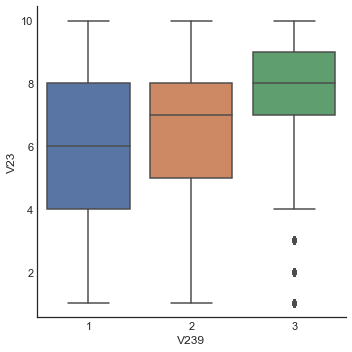

In [166]:
sns.catplot(x='V239', y='V23', kind='box', data=df2)

In [169]:
df2.V248.replace(['No formal education','Incomplete primary school'],1, inplace = True)
df2.V248.replace(['Complete primary school','Incomplete secondary school: university-preparatory type', \
                  'Incomplete secondary school: technical/ vocational type'],2, inplace = True)
df2.V248.replace(['Complete secondary school: university-preparatory type',\
                  'Complete secondary school: technical/ vocational type'] ,3, inplace= True)
df2.V248.replace(['8','9'],4, inplace = True)


In [174]:
df2.V242.unique()

array([24, 26, 28, 35, 36, 41, 44, 59, 72, 23, 29, 30, 31, 40, 47, 52, 68,
       19, 20, 65, 32, 42, 46, 55, 76, 18, 21, 63, 25, 87, 45, 49, 51, 61,
       62, 33, 37, 48, 60, 50, 34, 70, 43, 38, 39, 22, 58, 27, 53, 73, 71,
       74, 56, 54, 67, 57, 64, 69, 75, 66, 86, 91, 81, 83, 78, 85, 79, 80,
       77, 82, 92, 89, '33', '29', '41', '39', '42', '18', '68', '80',
       '38', '20', '25', '22', '35', '34', '81', '24', '60', '23', '57',
       '72', '19', '21', '70', '44', '30', '32', '53', '37', '50', '31',
       '65', '51', '54', '45', '46', '66', '52', '27', '55', '73', '47',
       '49', '64', '59', '40', '69', '26', '79', '36', '62', '28', '58',
       '85', '67', '75', '43', '76', '83', '88', '74', '82', '71', '48',
       '63', '61', '84', '77', '56', '78', '89', '90', '92', 84, 93, 88,
       17, 97, 99, 98, 90, 95, 94, '93', '91', '95', '94', '98', '86',
       '17', '87', 16], dtype=object)

In [ ]:
ages = pd.DataFrame([81, 42, 18, 55, 23, 35], columns=['age'])

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages['agerange'] = pd.cut(ages.age, bins, labels = labels,include_lowest = True)
